In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

%matplotlib nbagg

In [2]:
basedir: str = os.getcwd()

## 4. Preprocessing and pipelines
This chapter introduces pipelines, and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Preprocessing techniques will be introduced as a way to enhance model performance, and pipelines will tie together concepts from previous chapters.
### Exploring categorical features

In [3]:
filepath: str = os.path.join(basedir, 'data/gm_2008_region.csv')
gapminder: pd.DataFrame = pd.read_csv(os.path.normpath(filepath))
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


Here we are going to explore the `'Region'` feature. Boxplots are particularly useful for visualizing categorical features such as this.

<IPython.core.display.Javascript object>


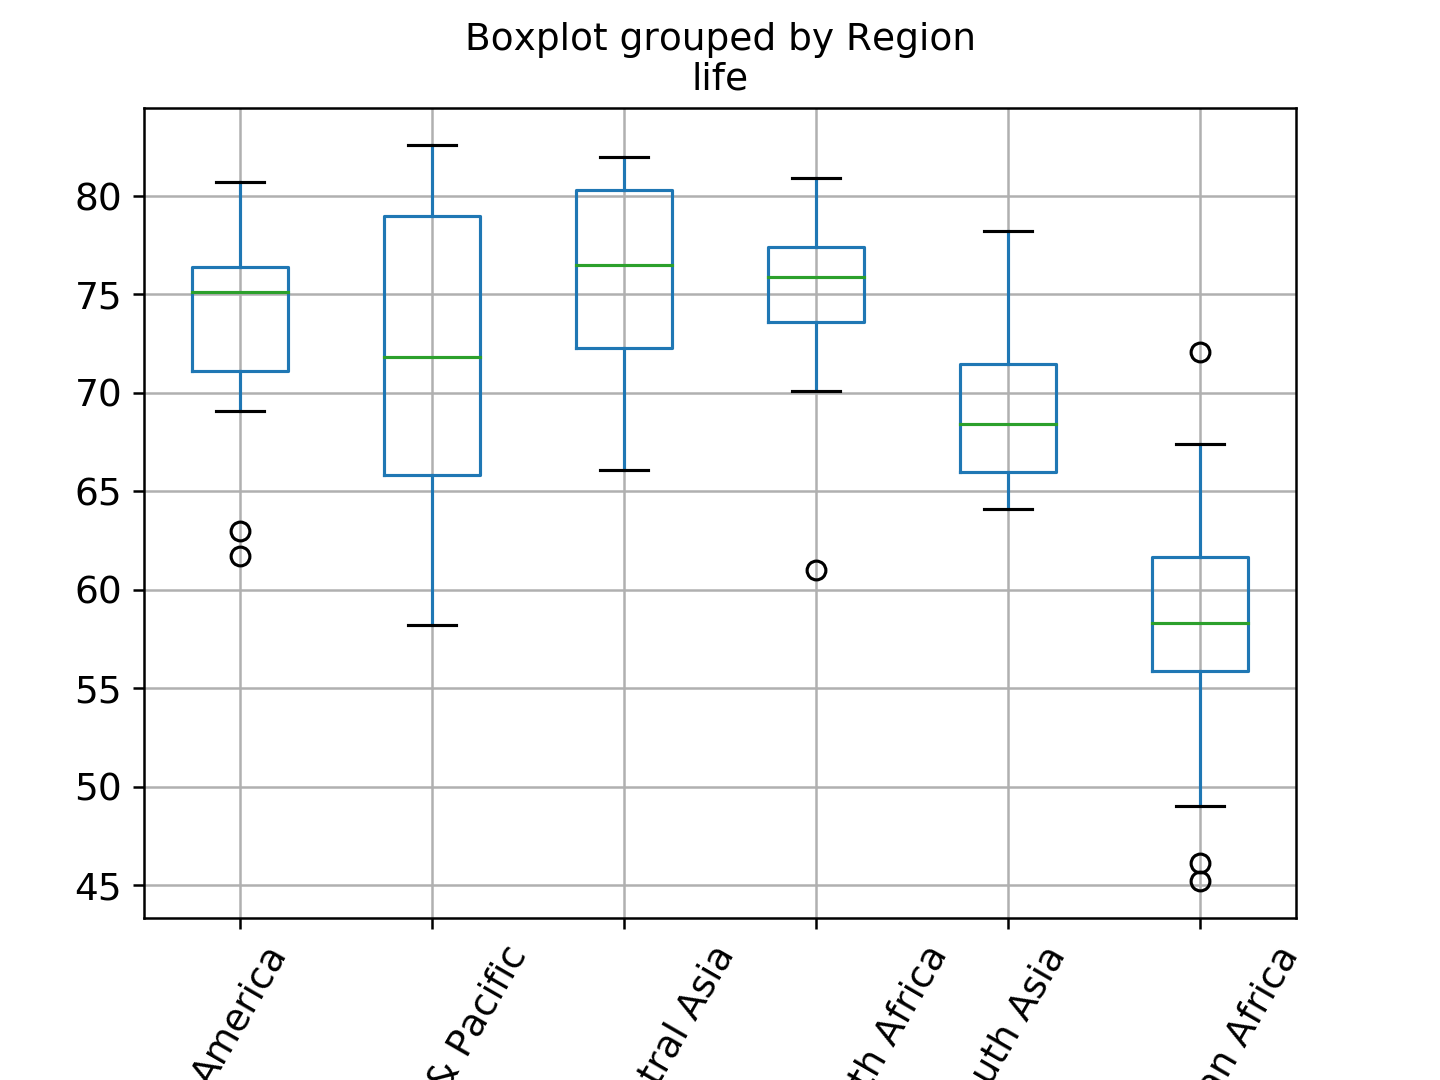

In [4]:
gapminder.boxplot('life', by='Region', rot=60, fontsize='large')
plt.show()

A box plot is a method for graphically depicting groups of numerical data through their quartiles. 

The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). 

The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than $1.5 \times IQR$ with $IQR = Q3 - Q1$ from the edges of the box, ending at the farthest data point within that interval. 

Outliers are plotted as separate dots.

### Creating dummy variables
Scikit-learn does not accept non-numerical features. 

We can see from the boxplot above that the `'Region'` feature contains very useful information that can predict life expectancy. 

For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. 

Therefore, if we are trying to predict life expectancy, it would be preferable to retain the `'Region'` feature. 

To do this, you need to binarize it by creating dummy variables.

In [5]:
# Create dummy variables
gapminder_region: pd.DataFrame = pd.get_dummies(gapminder)
print(gapminder_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [6]:
# Create dummy variables with drop_first=True in order to remove 'Region_America'
gapminder_region: pd.DataFrame = pd.get_dummies(gapminder, drop_first=True)
print(gapminder_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Having created the dummy variables from the `'Region'` feature, we can build regression models.

Here, we will use ridge regression to perform 5-fold cross-validation.

In [7]:
y: np.ndarray = gapminder_region.life.to_numpy()
X: np.ndarray = gapminder_region.drop('life', axis=1).to_numpy()

ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation
ridge_cv = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


In [8]:
print(f"The average R-squared is {np.mean(ridge_cv) * 100:.2f}%")

The average R-squared is 83.30%


In [14]:
def update_ridge_score(numfolds: int):
    """This function is linked to the slider."""
    avg_r2 = np.mean(cross_val_score(ridge, X, y, cv=numfolds, scoring='r2'))
    print(f"The average R-squared is {avg_r2 * 100:.2f}%")



style = {'description_width': 'initial'}
numfolds = widgets.IntSlider(min=2, max=10, value=5, step=1, 
                             description='Number of folds: ', 
                             orientation='horizontal',
                             readout=True,  # displays the current value of the slider next to it
                             continuous_update=False,
                             readout_format='d',
                             style=style)
widgets.interactive(update_ridge_score, numfolds=numfolds)

interactive(children=(IntSlider(value=5, continuous_update=False, description='Number of folds: ', max=10, min…